#                                           # Crop Yield Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv("yield_df.csv") 
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.tail()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [7]:
 df.shape

(28242, 7)

In [8]:
df.duplicated().sum()

2310

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [13]:
numerical_columns =df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [14]:
correlation_matrix =df[numerical_columns].corr()

In [15]:
correlation_matrix.corr()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,-0.087961,-0.497836,-0.104023,-0.389003
hg/ha_yield,-0.087961,1.000000,-0.459318,-0.214293,-0.605007
average_rain_fall_mm_per_year,-0.497836,-0.459318,1.000000,-0.119913,0.394968
pesticides_tonnes,-0.104023,-0.214293,-0.119913,1.000000,-0.306668
avg_temp,-0.389003,-0.605007,0.394968,-0.306668,1.000000


In [16]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

# Checking Outliers

<Axes: xlabel='avg_temp'>

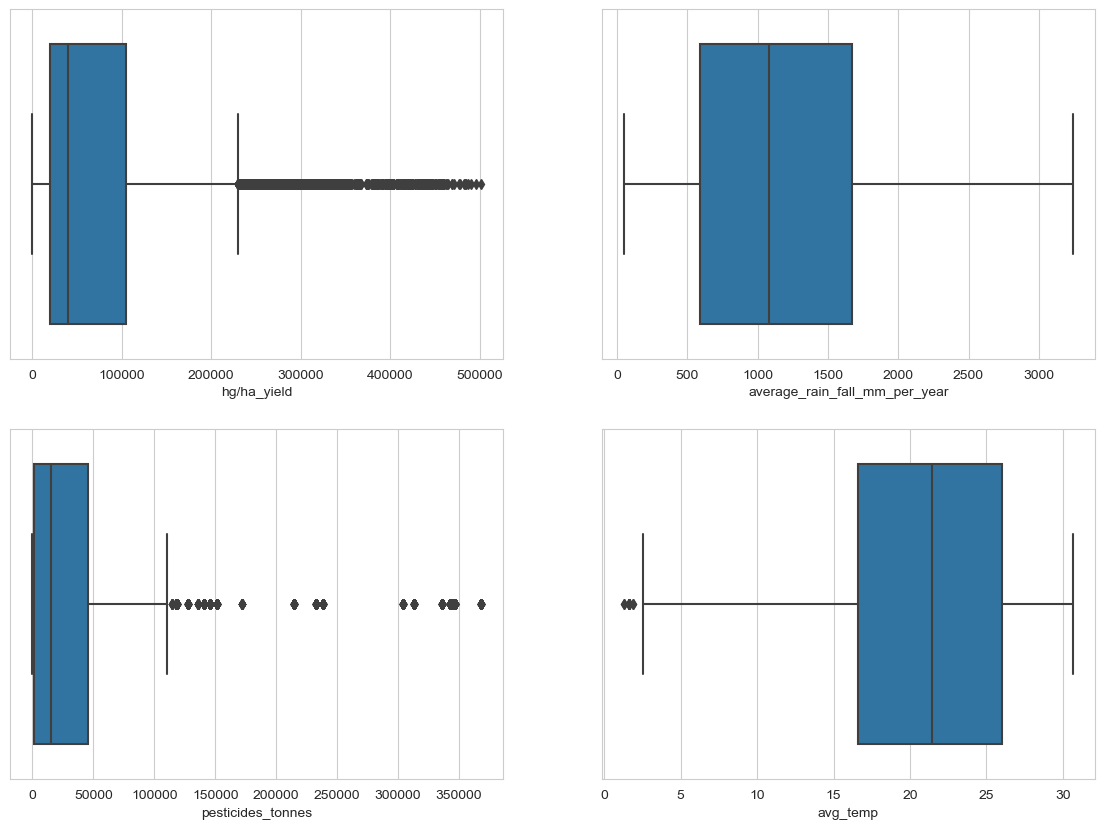

In [17]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
sns.boxplot(x='hg/ha_yield',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='average_rain_fall_mm_per_year',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='pesticides_tonnes',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='avg_temp',data=df)

In [18]:
print("Highest allowed",df['hg/ha_yield'].mean()+3*df['hg/ha_yield'].std())
print("Lowest allowed",df['hg/ha_yield'].mean()-3*df['hg/ha_yield'].std())


Highest allowed 330920.94958182925
Lowest allowed -176964.68373268537


In [19]:
print("Highest allowed",df['pesticides_tonnes'].mean()+3*df['pesticides_tonnes'].std())
print("Lowest allowed",df['pesticides_tonnes'].mean()-3*df['pesticides_tonnes'].std())


Highest allowed 206468.27797259335
Lowest allowed -136903.13149102617


In [20]:
print("Highest allowed",df['avg_temp'].mean()+3*df['avg_temp'].std())
print("Lowest allowed",df['avg_temp'].mean()-3*df['avg_temp'].std())

Highest allowed 39.740455926151284
Lowest allowed 1.1040450764709604


In [21]:
df[(df['hg/ha_yield']>156793.60438832606)|(df['hg/ha_yield']<-68077.52093896193)]


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
64,Albania,Potatoes,2005,167061,1485.0,880.64,15.67
68,Albania,Potatoes,2006,170745,1485.0,943.61,15.92
72,Albania,Potatoes,2007,188902,1485.0,1006.57,16.67
76,Albania,Potatoes,2008,193878,1485.0,1069.54,16.71
80,Albania,Potatoes,2009,219780,1485.0,1132.50,16.73
...,...,...,...,...,...,...,...
28204,Zimbabwe,Potatoes,2009,166136,657.0,3269.99,20.52
28212,Zimbabwe,Potatoes,2010,166825,657.0,3305.17,21.17
28220,Zimbabwe,Potatoes,2011,167336,657.0,3340.35,20.78
28228,Zimbabwe,Potatoes,2012,171875,657.0,3375.53,20.52


In [22]:
df[(df['pesticides_tonnes']>96586.80209087113)|(df['pesticides_tonnes']<-51678.80822750837)]


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
681,Argentina,Cassava,2010,101000,591.0,105915.04,17.33
682,Argentina,Cassava,2010,101000,591.0,105915.04,17.84
683,Argentina,Maize,2010,78040,591.0,105915.04,17.33
684,Argentina,Maize,2010,78040,591.0,105915.04,17.84
685,Argentina,Potatoes,2010,289849,591.0,105915.04,17.33
...,...,...,...,...,...,...,...
15709,Italy,Soybeans,1990,33588,832.0,100596.40,12.83
15710,Italy,Sweet potatoes,1990,214829,832.0,100596.40,7.97
15711,Italy,Sweet potatoes,1990,214829,832.0,100596.40,12.83
15712,Italy,Wheat,1990,29243,832.0,100596.40,7.97


In [23]:
df[(df['avg_temp']>39.645814232383266)|(df['avg_temp']<1.3175061054983885)]


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
21694,Norway,Potatoes,2010,251662,1414.0,698.98,1.3
21695,Norway,Wheat,2010,45975,1414.0,698.98,1.3


In [24]:
new_df=df[(df['hg/ha_yield']<156793.60438832606)&(df['hg/ha_yield']>-68077.52093896193)]
new_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [25]:
new_df=df[(df['pesticides_tonnes']<96586.80209087113)&(df['pesticides_tonnes']>-51678.80822750837)]
new_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [26]:
new_df=df[(df['avg_temp']<39.645814232383266)&(df['avg_temp']>1.3175061054983885)]
new_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [27]:
new_df=df.loc[(df['hg/ha_yield']<156793.60438832606)&(df['hg/ha_yield']>-68077.52093896193)]
print('Before removing outliers:',len(df))
print('After removing outliers:',len(new_df))
print('Outliers:',len(df)-len(new_df))

Before removing outliers: 25932
After removing outliers: 21847
Outliers: 4085


In [28]:
new_df=df.loc[(df['pesticides_tonnes']<96586.80209087113)&(df['pesticides_tonnes']>-51678.80822750837)]
print('Before removing outliers:',len(df))
print('After removing outliers:',len(new_df))
print('Outliers:',len(df)-len(new_df))

Before removing outliers: 25932
After removing outliers: 24384
Outliers: 1548


In [29]:
new_df=df.loc[(df['avg_temp']<39.645814232383266)&(df['avg_temp']>1.3175061054983885)]
print('Before removing outliers:',len(df))
print('After removing outliers:',len(new_df))
print('Outliers:',len(df)-len(new_df))

Before removing outliers: 25932
After removing outliers: 25930
Outliers: 2


In [30]:
new_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


# Visualization

# histplot for average rainfall per year vs frequency

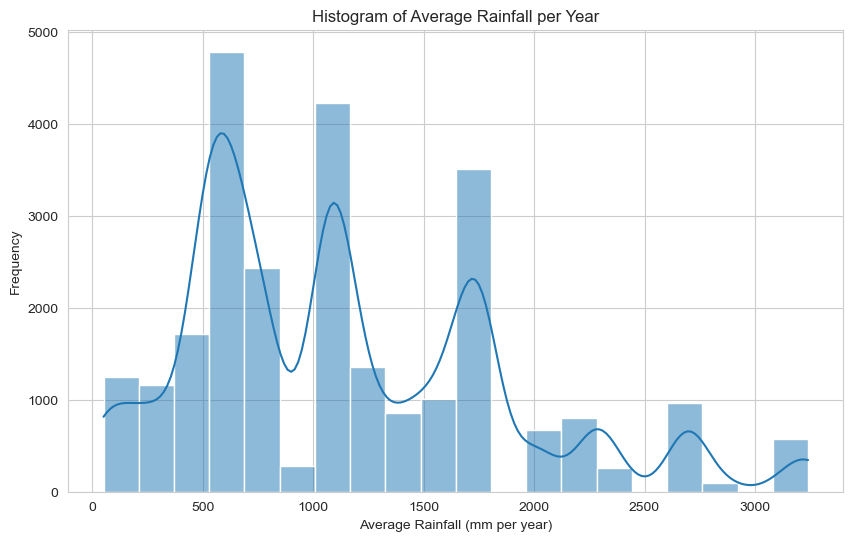

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(new_df['average_rain_fall_mm_per_year'], bins=20, kde=True)
plt.title('Histogram of Average Rainfall per Year')
plt.xlabel('Average Rainfall (mm per year)')
plt.ylabel('Frequency')
plt.show()


# graph frequency vs area

<Axes: xlabel='count', ylabel='Area'>

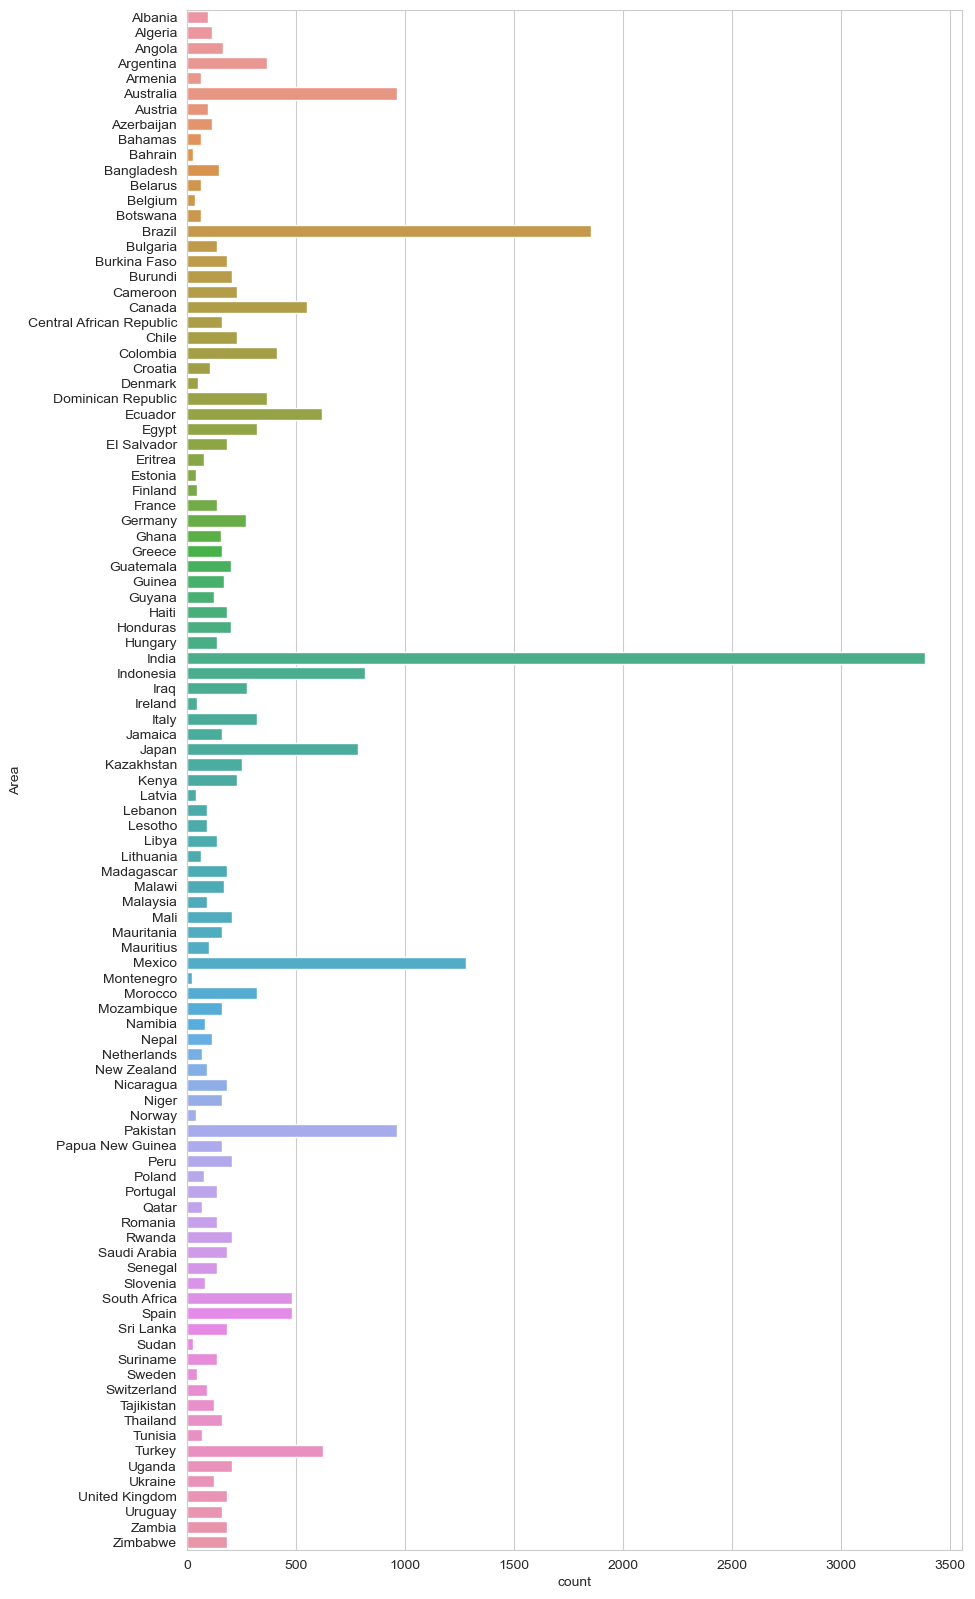

In [32]:
#graph frequency vs area

plt.figure(figsize=(10,20))
sns.countplot(y=new_df['Area'])

# yield per country

In [33]:
len(new_df['Area'])

25930

In [34]:
#yield per country
Country=(new_df['Area'].unique())

In [35]:
for state in Country:
    print(state)

Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Belarus
Belgium
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cameroon
Canada
Central African Republic
Chile
Colombia
Croatia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Eritrea
Estonia
Finland
France
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Honduras
Hungary
India
Indonesia
Iraq
Ireland
Italy
Jamaica
Japan
Kazakhstan
Kenya
Latvia
Lebanon
Lesotho
Libya
Lithuania
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Montenegro
Morocco
Mozambique
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Norway
Pakistan
Papua New Guinea
Peru
Poland
Portugal
Qatar
Romania
Rwanda
Saudi Arabia
Senegal
Slovenia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Tajikistan
Thailand
Tunisia
Turkey
Uganda
Ukraine
United Kingdom
Uruguay
Zambia
Zimbabwe


In [36]:
yield_per_country = []
for state in Country:
    yield_per_country.append(new_df[new_df['Area']==state]['hg/ha_yield'].sum())

In [37]:
new_df['hg/ha_yield'].sum()

1995899306

<Axes: >

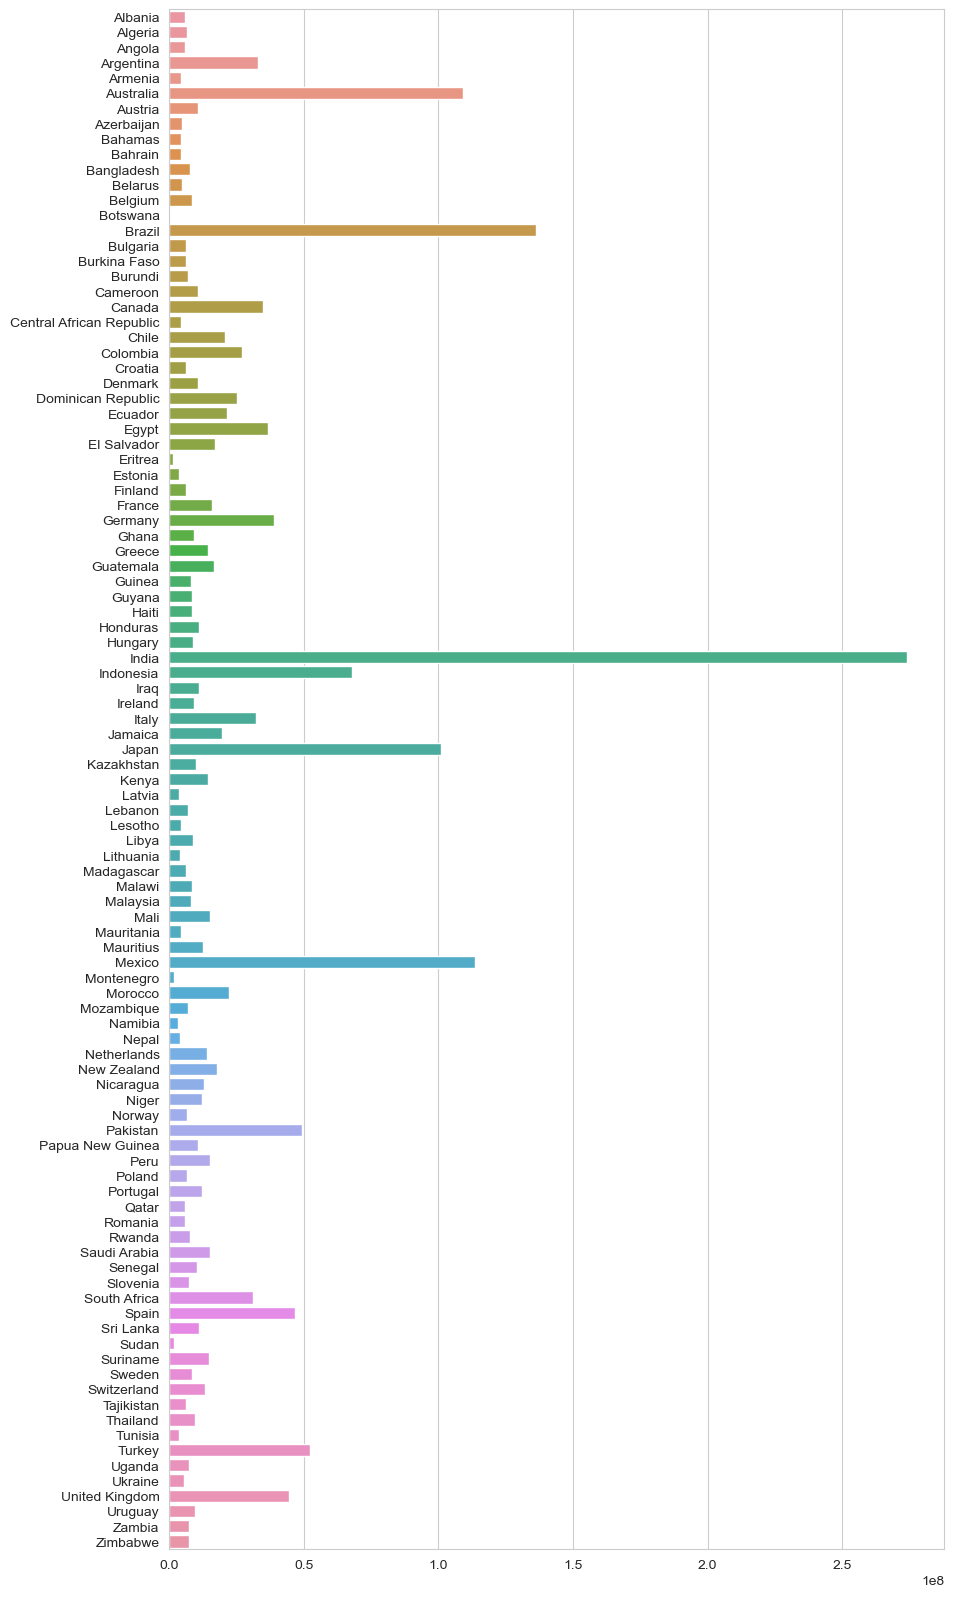

In [38]:
#yeild per country graph

plt.figure(figsize=(10,20))
sns.barplot(y=Country,x= yield_per_country)

# Heatmap

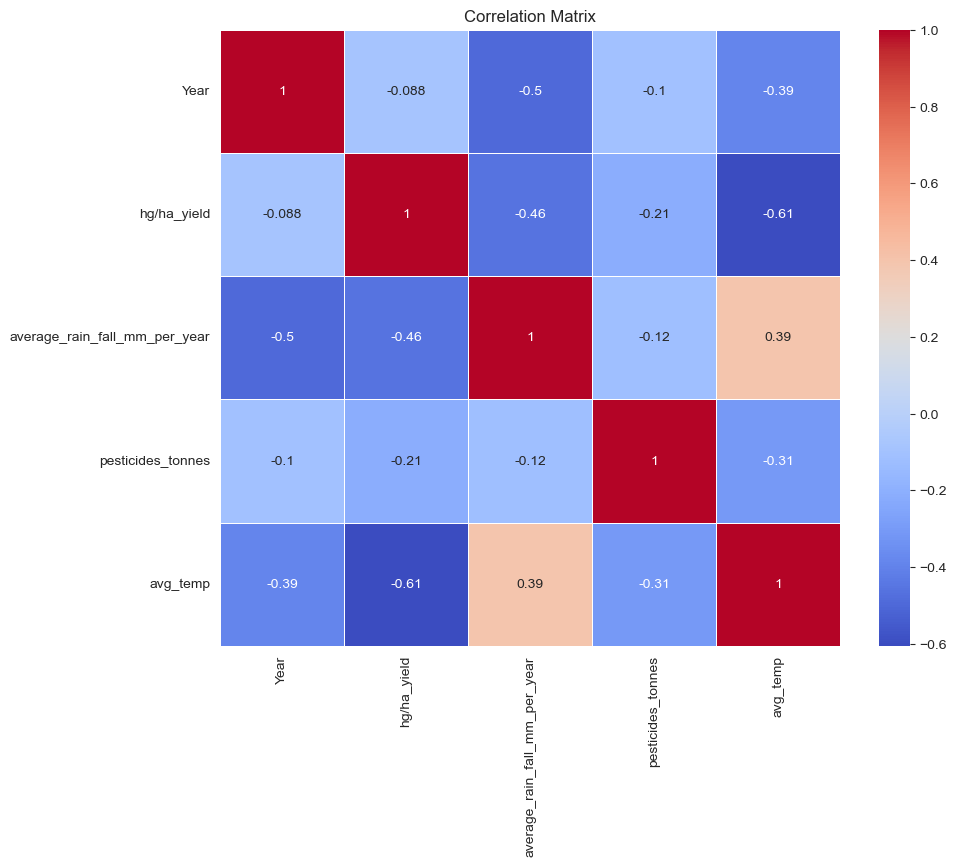

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [40]:
new_df['Item'].value_counts()

Item
Potatoes                3955
Maize                   3824
Wheat                   3538
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64

# Count of items

<Axes: xlabel='count', ylabel='Item'>

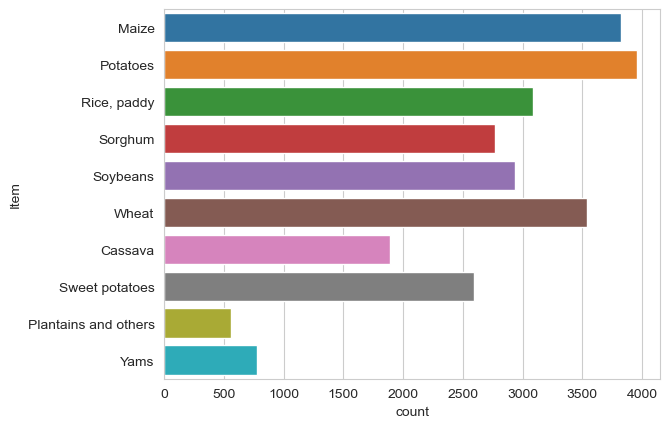

In [41]:
sns.countplot(y=new_df['Item'])

In [42]:
#yeild vs item

crops = (new_df['Item'].unique())

In [43]:
len(crops)

10

In [44]:
yield_per_crop= []
for crop in crops:
    yield_per_crop.append(new_df[new_df['Item']==crop]['hg/ha_yield'].sum())

In [45]:
yield_per_crop

[142020761,
 785669947,
 127646024,
 52906376,
 49957039,
 106568811,
 275132269,
 310269345,
 58958974,
 86769760]

# train,test ans Split

In [46]:

col=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
new_df=new_df[col]

In [47]:
new_df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.00,16.37,Albania,Maize,36613
1,1990,1485.0,121.00,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.00,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [48]:
x=new_df.drop('hg/ha_yield',axis=1)
y=new_df['hg/ha_yield']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
x_train.shape

(20744, 6)

In [52]:
x_test.shape

(5186, 6)

In [53]:
x_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
20560,1996,346.0,11806.86,17.97,Morocco,"Rice, paddy"
7351,2007,1410.0,5689.80,27.12,Dominican Republic,Plantains and others
10619,1990,1083.0,75000.00,26.36,India,Soybeans
12754,2002,1083.0,42482.56,27.67,India,Sweet potatoes
13477,2007,1083.0,27422.77,25.95,India,Wheat
...,...,...,...,...,...,...
23680,2004,854.0,16942.00,16.31,Portugal,Yams
5960,2006,537.0,36572.75,7.85,Canada,Wheat
860,1991,534.0,17866.00,18.73,Australia,Potatoes
17223,1998,250.0,6416.14,6.94,Kazakhstan,Potatoes


# converting categorical to numeric and scaling the values

In [54]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [55]:
ohe = OneHotEncoder(drop='first')
Scaler = StandardScaler()

In [56]:
preprocesser = ColumnTransformer(
transformers=[
    ('OneHotEncoder',ohe,[4,5]),
    ('Standardization',Scaler,[0,1,2,3])
],
remainder='passthrough'
)

In [57]:
preprocesser 

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('Standardization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [58]:
x_train_dummy = preprocesser.fit_transform(x_train)
x_test_dummy = preprocesser.transform(x_test)

In [59]:
x_train_dummy

<20744x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122869 stored elements in Compressed Sparse Row format>

# training model

In [60]:
#training model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [61]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor()
}

for name, mod in models.items():
    mod.fit(x_train_dummy, y_train)
    y_pred = mod.predict(x_test_dummy)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)  # Add MAE calculation
    rmse = np.sqrt(mse)  # Calculate RMSE from MSE
    
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:\nMSE: {mse}\nMAE: {mae}\nRMSE: {rmse}\nR2 Score: {r2}\n")

LinearRegression:
MSE: 1832121095.3260536
MAE: 30093.4051836697
RMSE: 42803.2836979367
R2 Score: 0.7460192072298069

Lasso:
MSE: 1832198970.0688722
MAE: 30073.5848116323
RMSE: 42804.19337014625
R2 Score: 0.7460084117158159

Ridge:
MSE: 1832363048.5554152
MAE: 30036.999286544247
RMSE: 42806.10994420557
R2 Score: 0.7459856660664179

KNeighborsRegressor:
MSE: 115184739.04336287
MAE: 4745.939529502506
RMSE: 10732.415340610094
R2 Score: 0.9840323265684277

DecisionTreeRegressor:
MSE: 141161040.84400308
MAE: 3971.2103740840726
RMSE: 11881.121194735919
R2 Score: 0.9804313191124274



# Accuracy Graph 

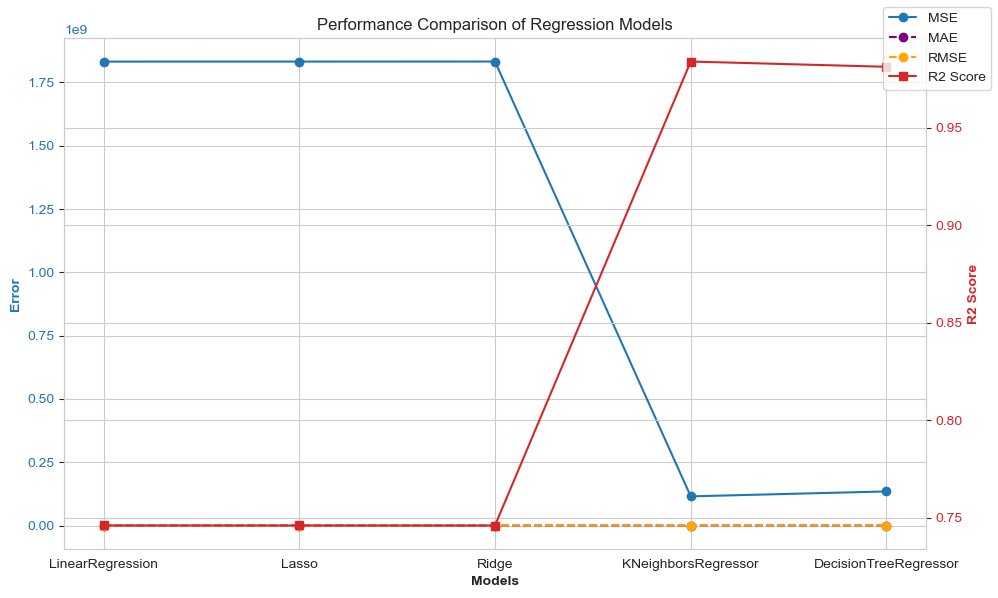

In [62]:
import matplotlib.pyplot as plt

# Data
models = {
    'LinearRegression': {'MSE': 1832121095.3260536, 'MAE': 30093.4051836697, 'RMSE': 42803.2836979367, 'R2 Score': 0.7460192072298069},
    'Lasso': {'MSE': 1832198970.0688722, 'MAE': 30073.5848116323, 'RMSE': 42804.19337014625, 'R2 Score': 0.7460084117158159},
    'Ridge': {'MSE': 1832363048.5554152, 'MAE': 30036.999286544247, 'RMSE': 42806.10994420557, 'R2 Score': 0.7459856660664179},
    'KNeighborsRegressor': {'MSE': 115184739.04336287, 'MAE': 4745.939529502506, 'RMSE': 10732.415340610094, 'R2 Score': 0.9840323265684277},
    'DecisionTreeRegressor': {'MSE': 134626532.1220594, 'MAE': 3934.200732741998, 'RMSE': 11602.867409483719, 'R2 Score': 0.9813371761050667}
}

names = list(models.keys())
mse_scores = [models[name]['MSE'] for name in names]
mae_scores = [models[name]['MAE'] for name in names]
rmse_scores = [models[name]['RMSE'] for name in names]
r2_scores = [models[name]['R2 Score'] for name in names]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line chart for MSE
color = 'tab:blue'
ax1.set_xlabel('Models', fontweight='bold')
ax1.set_ylabel('Error', color=color, fontweight='bold')
ax1.plot(names, mse_scores, marker='o', color=color, label='MSE')
ax1.plot(names, mae_scores, marker='o', linestyle='--', color='purple', label='MAE')  # Changed color to purple
ax1.plot(names, rmse_scores, marker='o', linestyle='--', color='orange', label='RMSE')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for R2 Score
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('R2 Score', color=color, fontweight='bold')
ax2.plot(names, r2_scores, marker='s', color=color, label='R2 Score')
ax2.tick_params(axis='y', labelcolor=color)

# Title
plt.title('Performance Comparison of Regression Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
fig.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


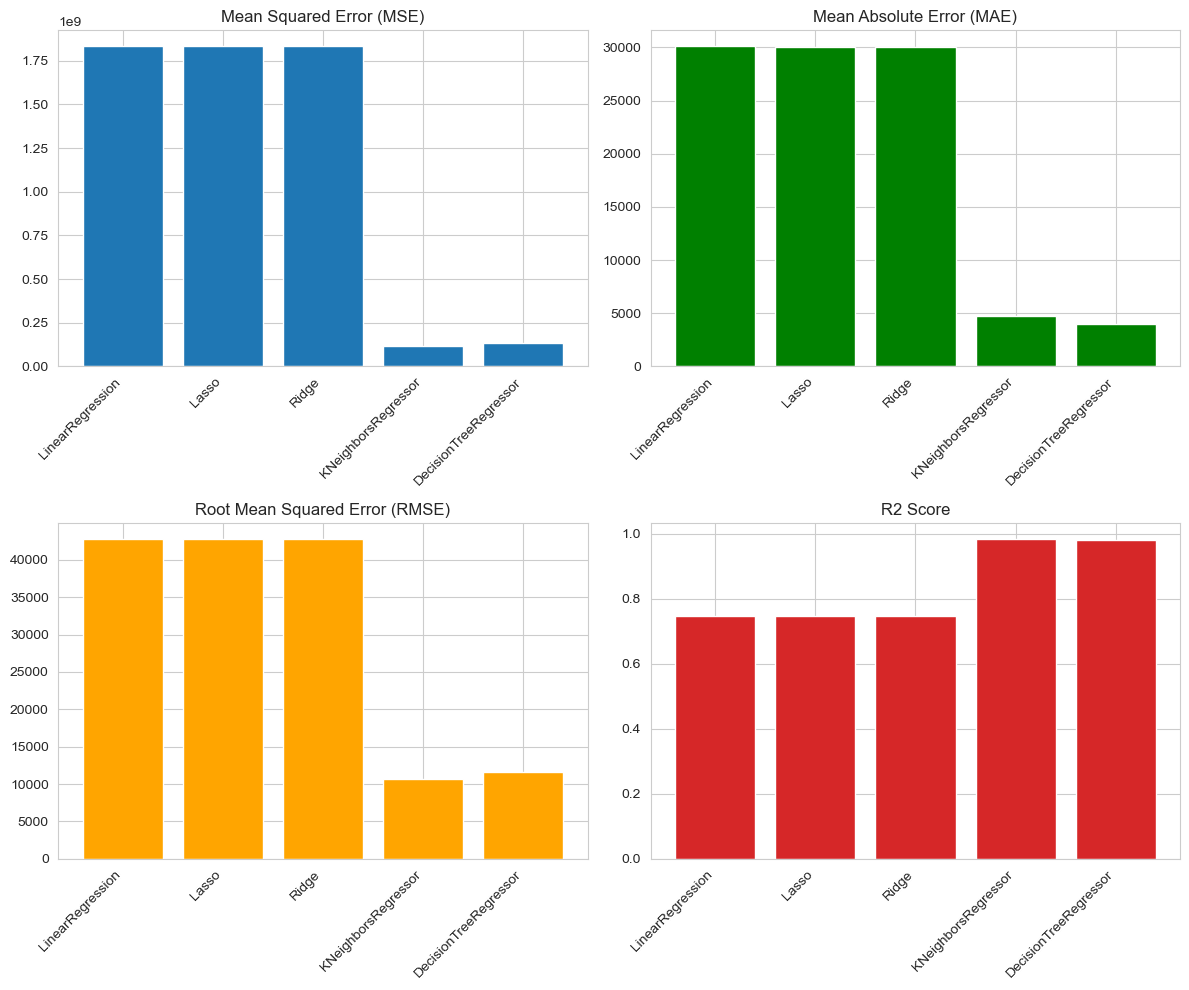

In [63]:
import matplotlib.pyplot as plt

# Data
models = {
    'LinearRegression': {
        'MSE': 1832121095.3260536,
        'MAE': 30093.4051836697,
        'RMSE': 42803.2836979367,
        'R2 Score': 0.7460192072298069
    },
    'Lasso': {
        'MSE': 1832198970.0688722,
        'MAE': 30073.5848116323,
        'RMSE': 42804.19337014625,
        'R2 Score': 0.7460084117158159
    },
    'Ridge': {
        'MSE': 1832363048.5554152,
        'MAE': 30036.999286544247,
        'RMSE': 42806.10994420557,
        'R2 Score': 0.7459856660664179
    },
    'KNeighborsRegressor': {
        'MSE': 115184739.04336287,
        'MAE': 4745.939529502506,
        'RMSE': 10732.415340610094,
        'R2 Score': 0.9840323265684277
    },
    'DecisionTreeRegressor': {
        'MSE': 134626532.1220594,
        'MAE': 3934.200732741998,
        'RMSE': 11602.867409483719,
        'R2 Score': 0.9813371761050667
    }
}

names = list(models.keys())
mse_scores = [models[name]['MSE'] for name in names]
mae_scores = [models[name]['MAE'] for name in names]
rmse_scores = [models[name]['RMSE'] for name in names]
r2_scores = [models[name]['R2 Score'] for name in names]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# MSE subplot
axs[0, 0].bar(names, mse_scores, color='tab:blue')
axs[0, 0].set_title('Mean Squared Error (MSE)')

# MAE subplot
axs[0, 1].bar(names, mae_scores, color='green')
axs[0, 1].set_title('Mean Absolute Error (MAE)')

# RMSE subplot
axs[1, 0].bar(names, rmse_scores, color='orange')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')

# R2 Score subplot
axs[1, 1].bar(names, r2_scores, color='tab:red')
axs[1, 1].set_title('R2 Score')

# Set x-axis ticks
for ax in axs.flat:
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


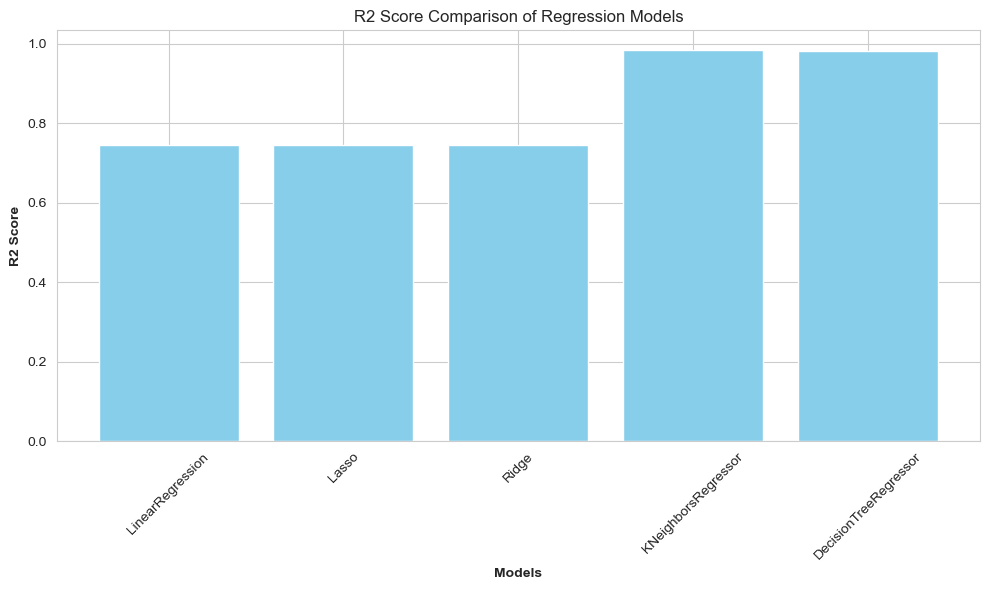

In [64]:
import matplotlib.pyplot as plt

# Data
models = {
    'LinearRegression': {'R2 Score': 0.7460192072298069},
    'Lasso': {'R2 Score': 0.7460084117158159},
    'Ridge': {'R2 Score': 0.7459856660664179},
    'KNeighborsRegressor': {'R2 Score': 0.9840323265684277},
    'DecisionTreeRegressor': {'R2 Score': 0.9813371761050667}
}

names = list(models.keys())
r2_scores = [model['R2 Score'] for model in models.values()]

# Plotting
plt.figure(figsize=(10, 6))

# Bar chart for R2 Score
plt.bar(names, r2_scores, color='skyblue')

# Title and labels
plt.title('R2 Score Comparison of Regression Models')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('R2 Score', fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


# select model

In [65]:
#select model

dtr=DecisionTreeRegressor()
dtr.fit(x_train_dummy,y_train)
dtr.predict(x_test_dummy)


array([77183., 19910.,  8947., ..., 14854., 34374., 58600.])

# prediction system

In [66]:


def prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
    features = np.array([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]])                                                                           
        
    transformed_features = preprocesser.transform(features)
    predicted_value=dtr.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]  


In [67]:
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [70]:
Year=1990
average_rain_fall_mm_per_year=1485.0
pesticides_tonnes=121.0
avg_temp=16.37
Area='Albania'
Item="Maize"
prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item)
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [71]:
Year=1990
average_rain_fall_mm_per_year=1485.0
pesticides_tonnes=121.0
avg_temp=16.37
Area='Albania'
Item="Potatoes"

prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item)
warnings.filterwarnings("ignore", message="X does not have valid feature names")